In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import tree
from sklearn.metrics import accuracy_score
from graphviz import Source
import random

In [7]:
# Load Data and Make Label Encoder

#load Dataset
Dataset=pd.read_csv("/kaggle/input/iris-data/Iris.csv")
Dataset.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


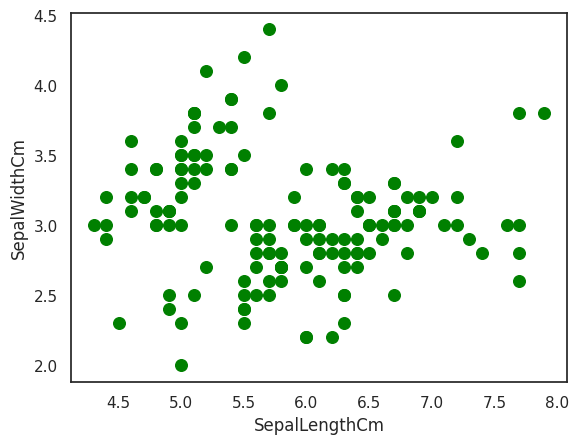

In [9]:
#To change color and size, add the following:
Dataset.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="green",s=70 )
plt.show()

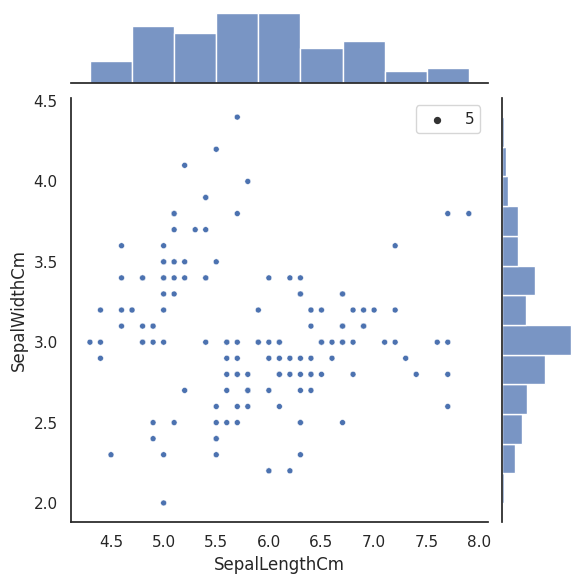

In [10]:
# Use seaborn jointplot, to make bivariate scatterplots and univariate histograms in one graph
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=Dataset, size=5)
plt.show()

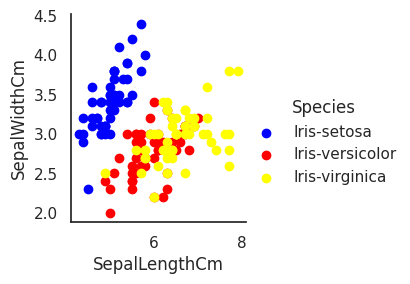

In [12]:
# Modify the graph above by assigning each species an individual color.
# Change the colors of the data points in the graph above
# Assign the colors a variable name, and insert hue_kws="variable name" as shown.
KS = {'color': ['blue', 'red', 'yellow']}
sns.FacetGrid(Dataset, hue_kws=KS, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

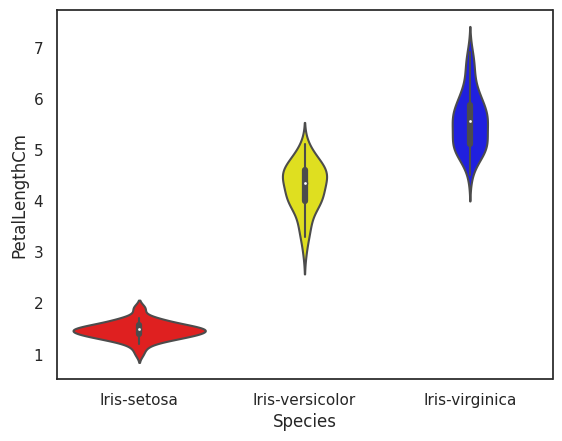

In [14]:
#To change the fill color of the violin, choose desired colors and set equal to pallete

sns.violinplot(x="Species", y="PetalLengthCm",  palette={"blue","red","yellow"}, data=Dataset, size=6)
plt.show()

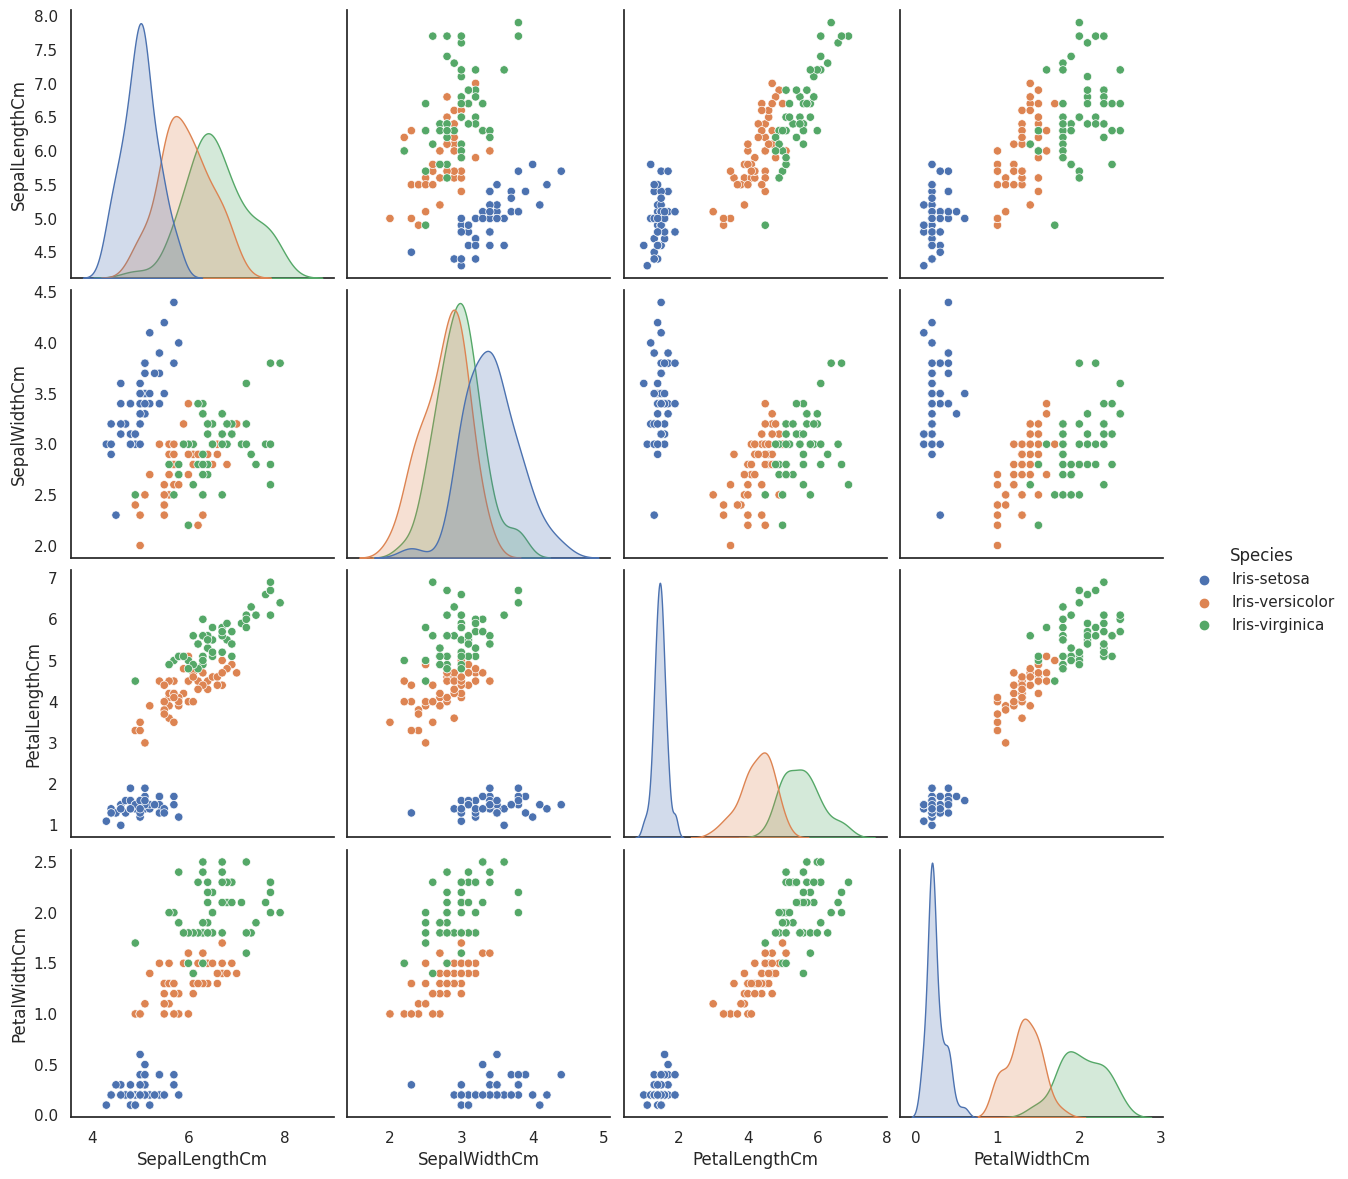

In [15]:
#Use pairplot to analyze the relationship between species for all characteristic combinations. 
# An observable trend shows a close relationship between two of the species

sns.pairplot(Dataset.drop("Id", axis=1), hue="Species", size=3)
plt.show()

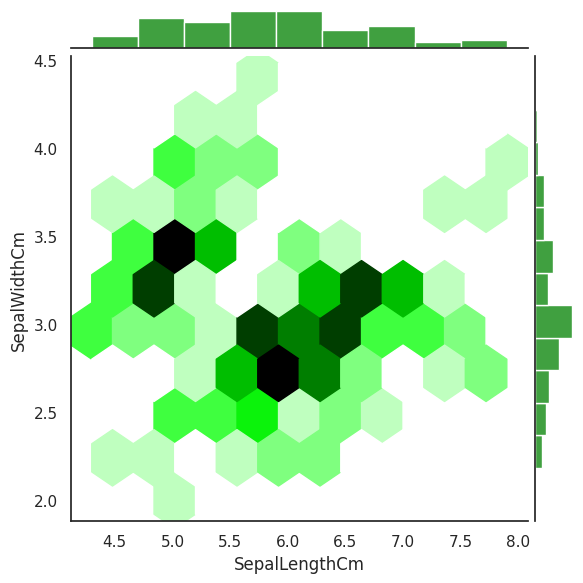

In [16]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=Dataset,ratio=10, kind='hex',color='green')
plt.show()

In [17]:
# Make label encoder for Target
label_Encoder=LabelEncoder()

# Applying Label Encoder for Species column
label_Encoder.fit(Dataset["Species"])

# Make Transformation on this column
Dataset["Species"]=label_Encoder.transform(Dataset["Species"])

del Dataset['Id']



In [18]:
# Show our Dataset after Encoding
Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
# Make Trainset and Testset

# Output or Target
y=Dataset["Species"]

# Features that the model will train on it
x=Dataset[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]


# Split Data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [25]:
# Bulding Model

dt_model=tree.DecisionTreeClassifier(criterion='entropy')

# Train model

dt_model.fit(train_x,train_y)


DecisionTreeClassifier(criterion='entropy')

In [21]:
# Make a prediction

# Create Dataframe to make a prediction
df=pd.DataFrame({"predicted_class":dt_model.predict(test_x),"Actual_class":test_y.tolist()})

In [22]:
# Printing DataFrame

display(df)

,predicted_class,Actual_class
0,0,0
1,2,2
2,2,2
3,1,1
4,0,0
5,2,2
6,1,1
7,1,2
8,0,0
9,1,1


In [23]:
# Calculating accuracy
Prediction_result=dt_model.predict(test_x)
Accuracy=accuracy_score(test_y.tolist(),Prediction_result)
print(Accuracy)

0.9333333333333333


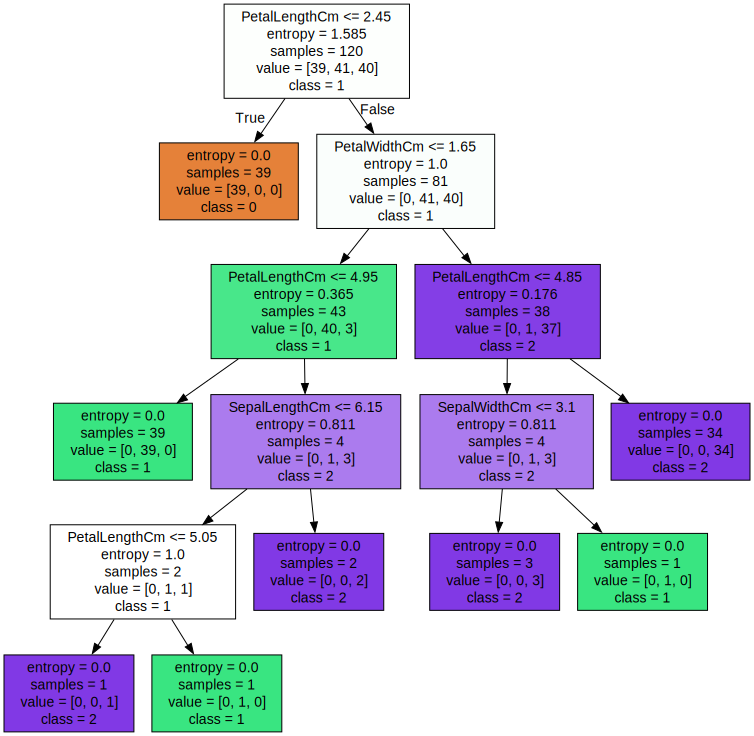

In [24]:
# Visualizing Tree

Names_of_classes=[str(class_name) for class_name in pd.unique(Dataset['Species'])]

graph=Source(tree.export_graphviz(dt_model,out_file=None,feature_names=x.columns,class_names=Names_of_classes,filled=True,))

display(graph)